# 🩺 Diabetes Prediction Using Machine Learning

This project demonstrates an end-to-end machine learning pipeline for predicting diabetes based on diagnostic measurements. It includes data cleaning, exploration, model training, evaluation, and comparison.


# Features Details :

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

**Pregnancies**: Number of times pregnant

**Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

**BloodPressure**: Diastolic blood pressure (mm Hg)

**SkinThickness**: Triceps skin fold thickness (mm)

**Insulin**: 2-Hour serum insulin (mu U/ml)

**BMI**: Body mass index (weight in kg/(height in m)^2)

**DiabetesPedigreeFunction**: Diabetes pedigree function

**Age**: Age (years)

**Outcome**: Class variable (0 or 1) **Our Traget**

## 📥 Data Loading and Libraries

In [1]:
#Analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ML libraries 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier,RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_validate,GridSearchCV
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler

#ModelEvaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


#waning 
import warnings
warnings.filterwarnings("ignore")

## 🔍 Dataset Overview

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Note:**
***Given the high variance in the depreciative values, data scaling is necessary prior to model development***

## 🧹 Data Preprocessing

In [6]:
Fill_data= df.columns
Fill_data = Fill_data.drop("Outcome")

In [7]:
for col in Fill_data:
    mean_1 = df[(df["Outcome"] == 1) & (df[col] != 0)][col].median()
    mean_0 = df[(df["Outcome"] == 0) & (df[col] != 0)][col].median()
    
    df.loc[(df[col] == 0) & (df["Outcome"] == 1), col] = mean_1
    df.loc[(df[col] == 0) & (df["Outcome"] == 0), col] = mean_0

In [8]:
#Checking for Duplicates
df.duplicated().sum()

np.int64(0)

In [9]:
Outliaers=[]
for feature in df:
    Q1, Q3 = df[feature].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    if (df[feature] > upper).any():
        print(feature,"yes")
        Outliaers.append(feature)
        #df.loc[df[feature] > upper,feature] = upper
    else:
        #df.loc[df[feature] < lower,feature] = lower
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


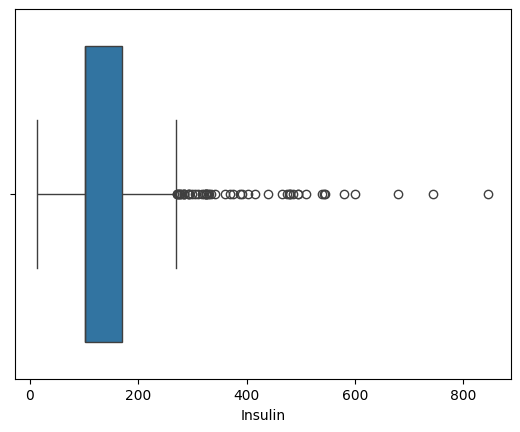

In [10]:
sns.boxplot(x=df["Insulin"]);

In [11]:
Q1, Q3 = df["Insulin"].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

In [12]:
df.loc[df["Insulin"] > upper,"Insulin"] = upper

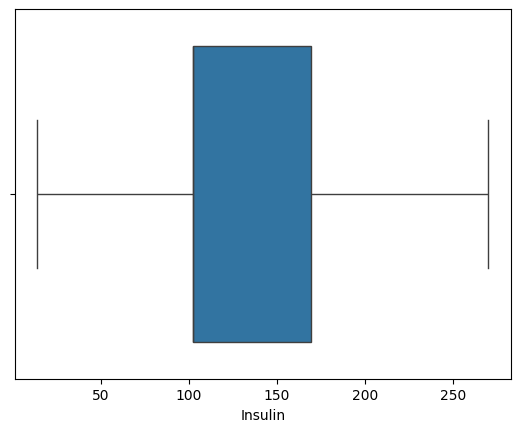

In [13]:
sns.boxplot(x=df["Insulin"]);

In [14]:
# another Method
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [15]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-3.06509976, -2.38250393, -2.15557018, -2.11501347, -2.08356175,
       -1.95386655, -1.83559384, -1.74974237, -1.7330214 , -1.71017168,
       -1.70215105, -1.68722889, -1.64294601, -1.64180205, -1.61181746,
       -1.61067772, -1.60925053, -1.60214364, -1.59998552, -1.58761193,
       -1.5783214 , -1.54655494, -1.5188879 , -1.510242  , -1.50390135,
       -1.4917993 , -1.4908793 , -1.48870215, -1.48419315, -1.48043912])

In [16]:
#We choose the threshold value according to lof scores
threshold = np.sort(df_scores)[7]
threshold

np.float64(-1.7497423670960557)

In [17]:
outlier = df_scores > threshold
df = df[outlier]

In [18]:
# The size of the data set was examined.
df.shape

(760, 9)

## 📊 Exploratory Data Analysis (EDA)

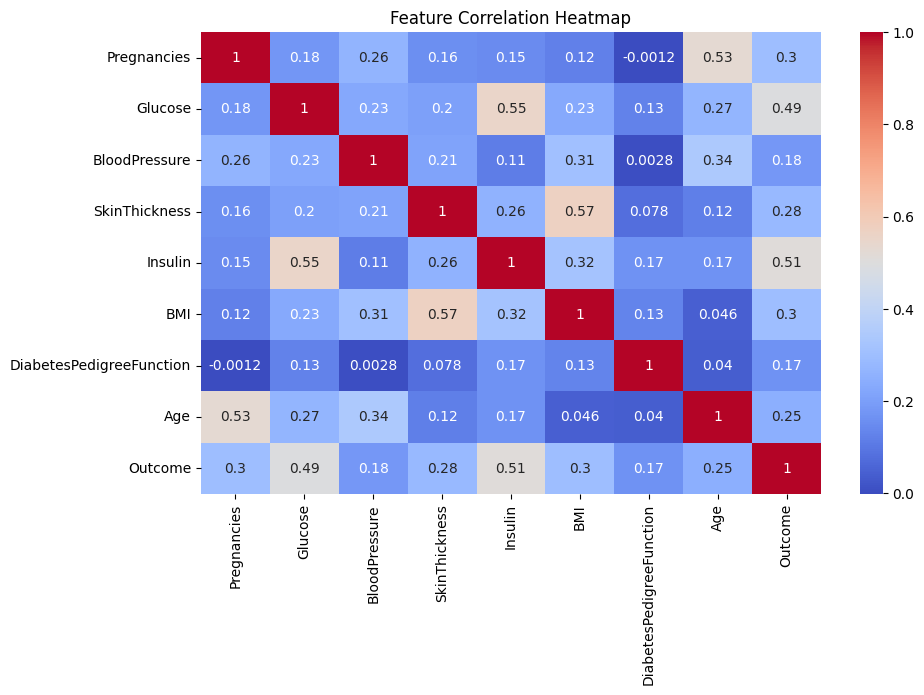

In [19]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

**Note :** ***As shown that BloodPressure and SkinThickness are weakest Corr to our Traget( can be Dropped)***

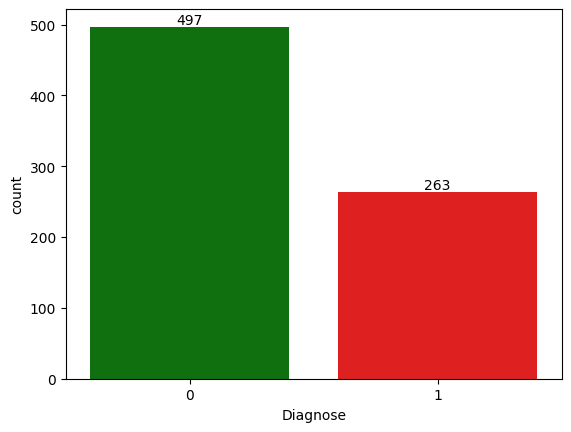

In [20]:
#Checking Bais between Target
ax=sns.countplot(x= "Outcome",data = df,palette=["g","r"])
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("Diagnose")
plt.show()

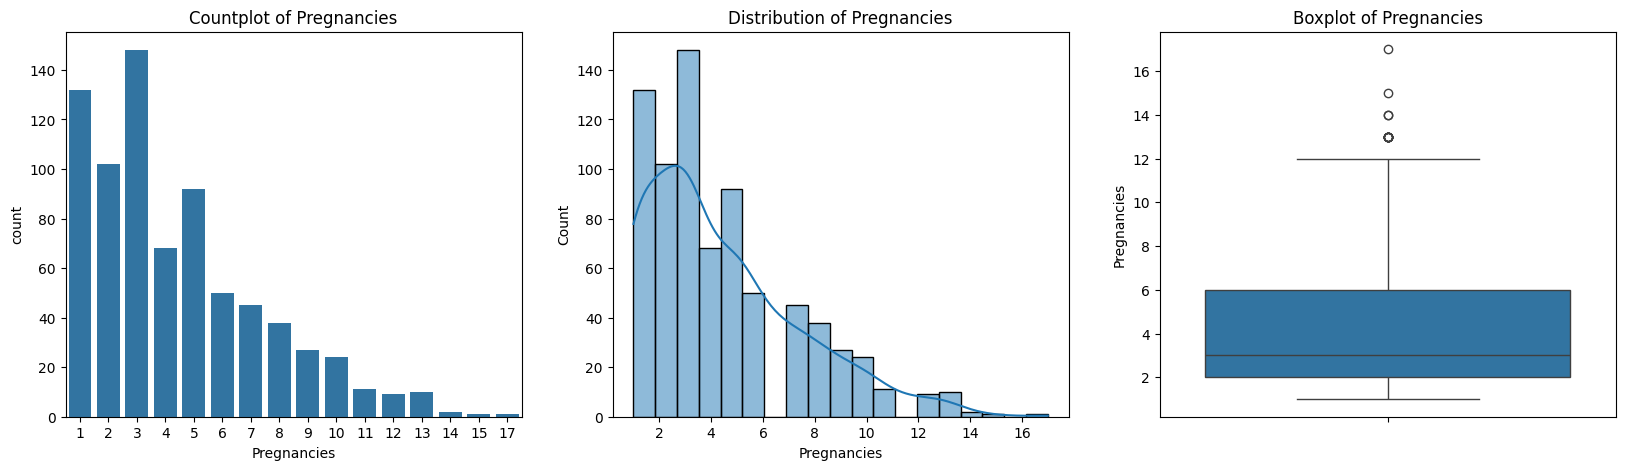

In [21]:
plt.figure(figsize=(20, 5))


plt.subplot(1, 3, 1)
sns.countplot(x="Pregnancies", data=df)
plt.title("Countplot of Pregnancies")


plt.subplot(1, 3, 2)
sns.histplot(df["Pregnancies"], kde=True)
plt.title("Distribution of Pregnancies")


plt.subplot(1, 3, 3)
sns.boxplot(y=df["Pregnancies"])
plt.title("Boxplot of Pregnancies")
plt.show()


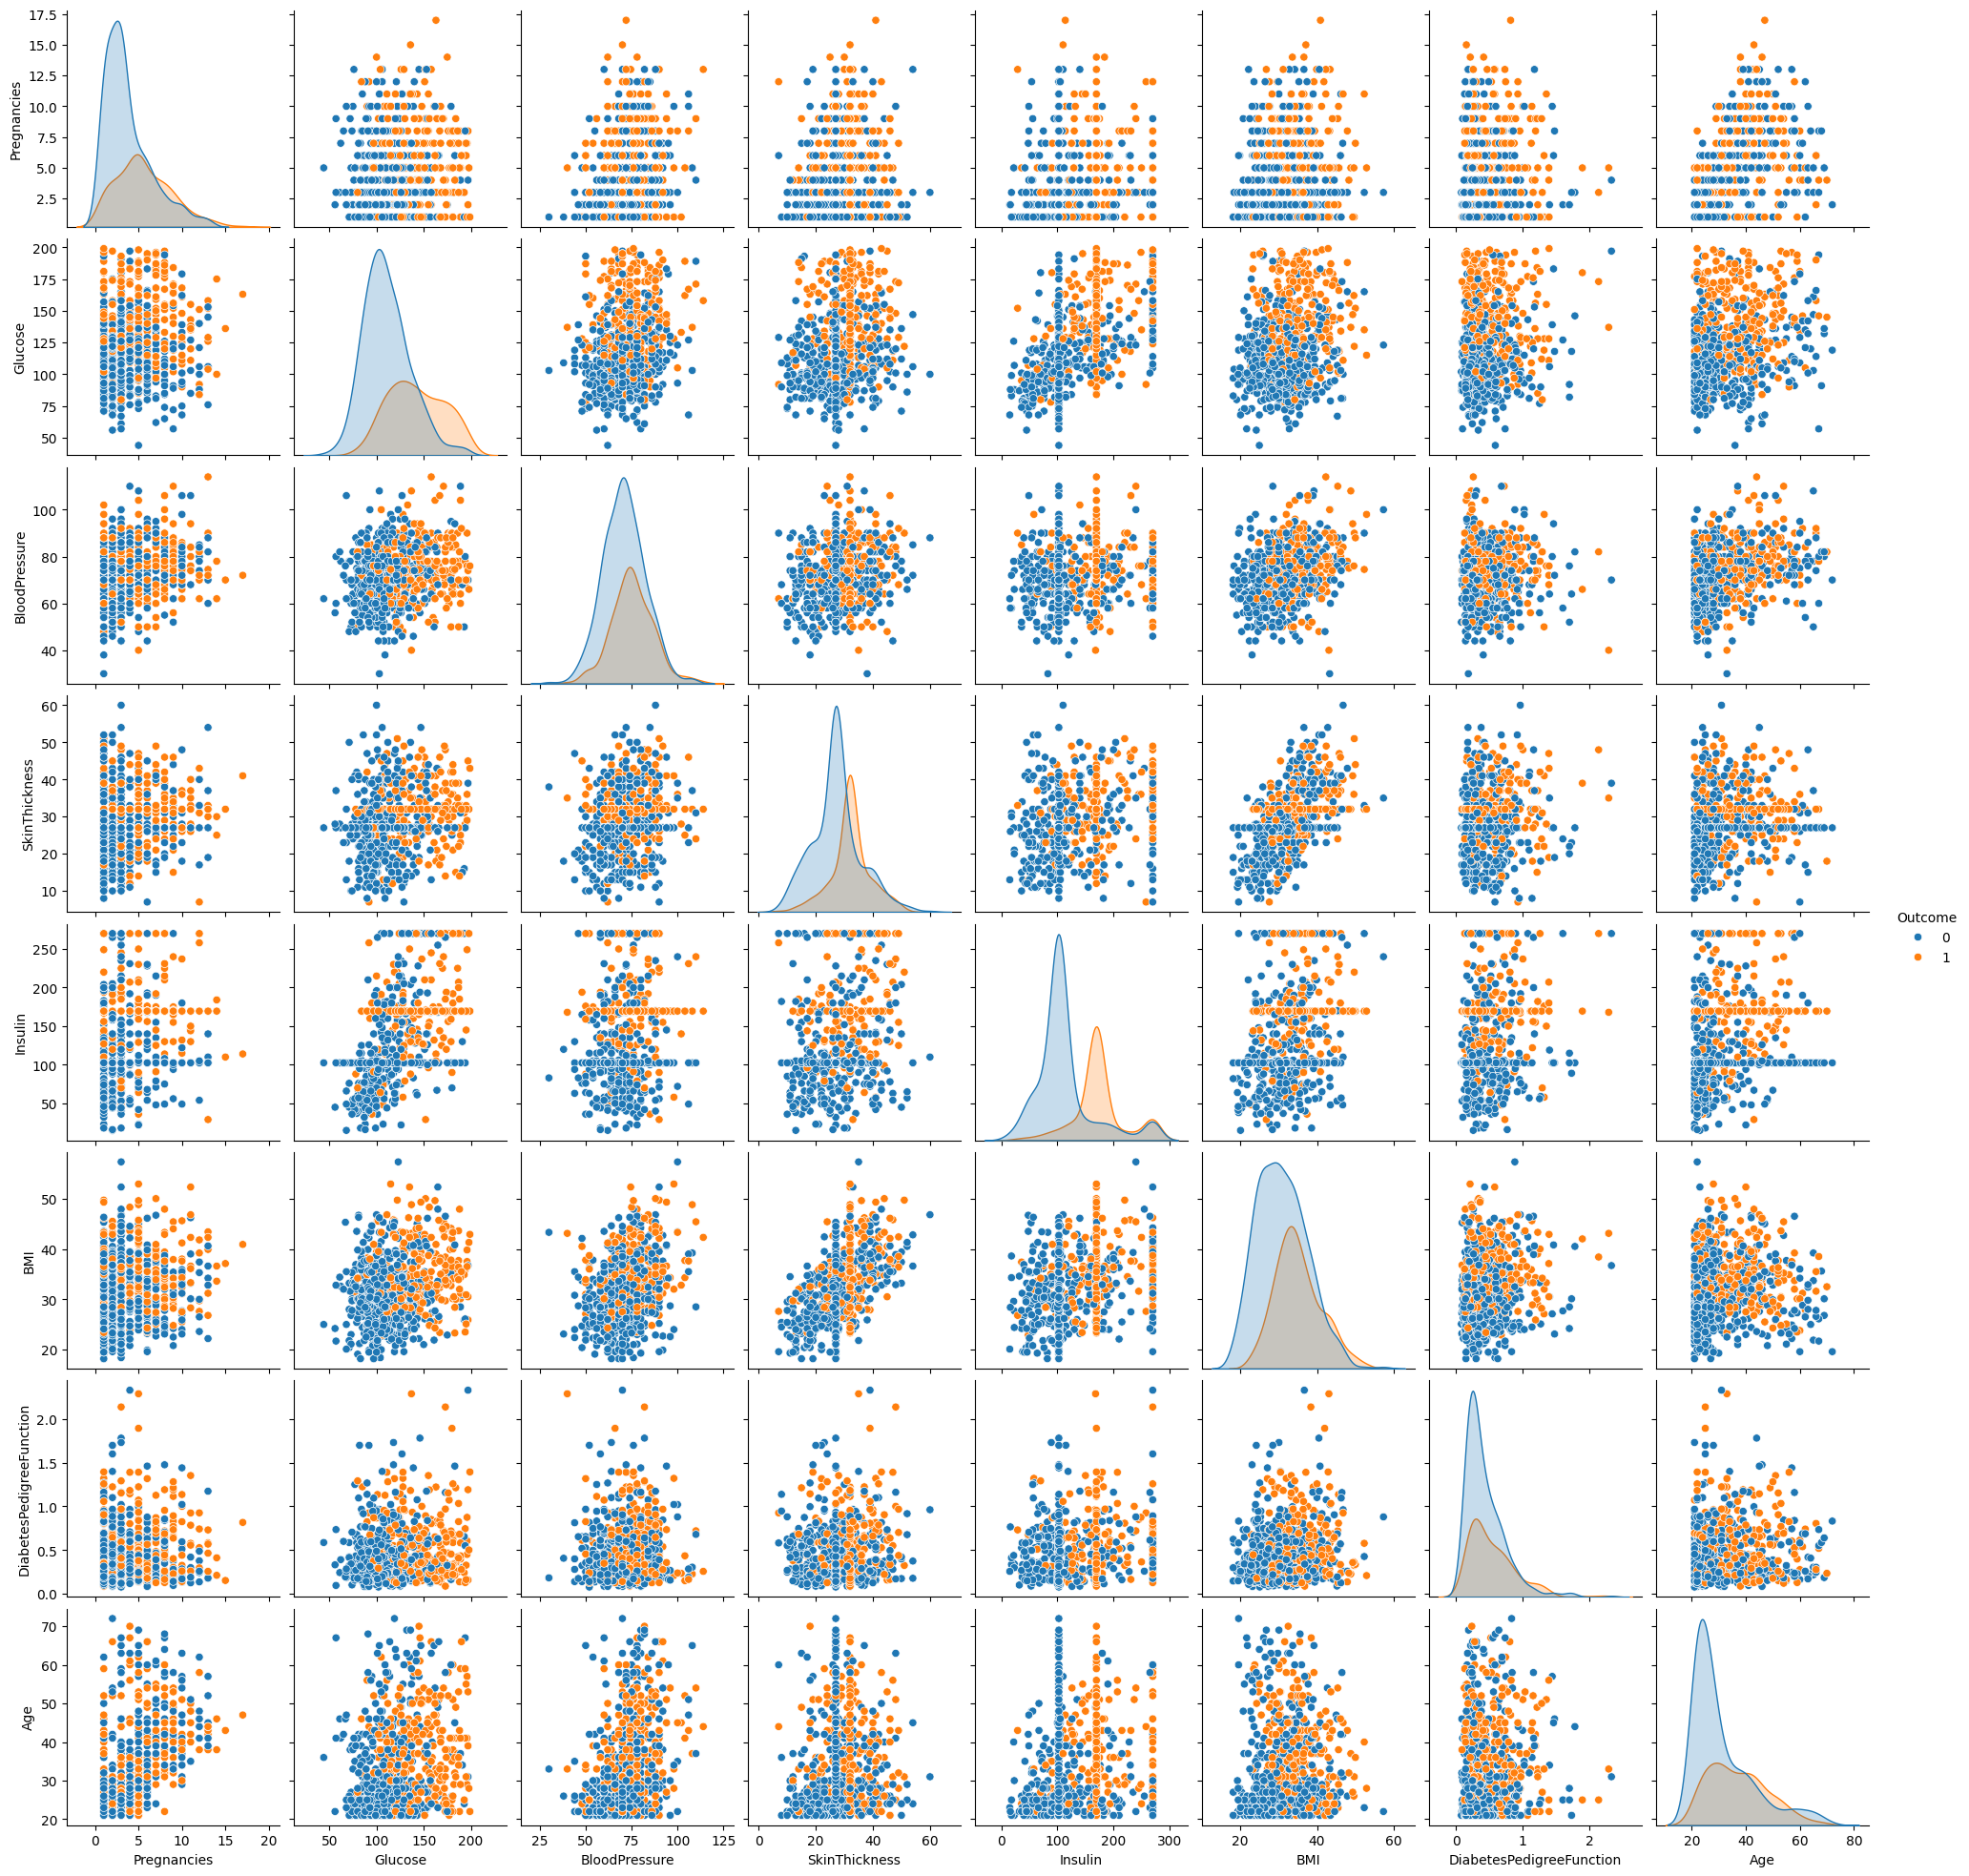

In [22]:
sns.pairplot(df,hue= "Outcome")

# Creating Model

In [23]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE,RandomOverSampler
from sklearn.model_selection import train_test_split

In [24]:
x = df.drop("Outcome",axis=1)
y = df["Outcome"]

## Scaling the Imblanace

In [25]:
SM= SMOTE(random_state=42)
oversample = RandomOverSampler()

## Splitting Data

In [26]:
x_train ,x_test,y_train,y_test = train_test_split(x,y, test_size=.2,random_state=42 , stratify= y )

In [27]:
# Implementing Models (Optimized)
Model = []

# Logistic Regression – improved regularization handling
Model.append(("LR", LogisticRegression(max_iter=1000, C=0.1, penalty='l2', solver='lbfgs')))

# K-Nearest Neighbors – reduced neighbors and uniform weights to prevent overfitting
Model.append(("KNN", KNeighborsClassifier(n_neighbors=5, p=2, weights='uniform')))

# Gaussian Naive Bayes – no tuning needed, but ensure input features are scaled
Model.append(("GNB", GaussianNB()))

# LightGBM – better regularization and depth settings
Model.append(("LGBM", LGBMClassifier(
    max_depth=7,
    num_leaves=31,
    min_data_in_leaf=20,
    min_split_gain=0.01,
    learning_rate=0.07,
    n_estimators=200,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42,
    verbose=-1
)))

# Support Vector Machine – tuning C and gamma
Model.append(("SVC", SVC(C=10, gamma=0.01, kernel='rbf', probability=True)))

# Decision Tree – simplified to reduce overfitting risk
Model.append(("DT", DecisionTreeClassifier(max_depth=6, min_samples_split=10, min_samples_leaf=10)))

# Random Forest – more balanced tree growth
Model.append(("RF", RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=42
)))

# XGBoost – fixed parameters for actual API, improved learning
Model.append(("XGB", XGBClassifier(
    learning_rate=0.07,
    max_depth=6,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    n_estimators=150,
    reg_alpha=0.1,
    reg_lambda=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)))

# AdaBoost – reasonable learning rate and estimators
Model.append(("ADA", AdaBoostClassifier(n_estimators=300, learning_rate=0.05, random_state=42)))

# Gradient Boosting – moderate depth and learning rate
Model.append(("GRB", GradientBoostingClassifier(
    learning_rate=0.07,
    n_estimators=250,
    max_depth=4,
    random_state=42
)))

# Voting Classifier – includes tuned models with soft voting
Model.append(("Voting", VotingClassifier(estimators=[
    ("XGB", XGBClassifier(
        learning_rate=0.07,
        max_depth=6,
        n_estimators=150,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42
    )),
    ("RF", RandomForestClassifier(
        n_estimators=300,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=4,
        max_features='sqrt',
        random_state=42
    )),
    ("DT", DecisionTreeClassifier(max_depth=6, min_samples_split=10, min_samples_leaf=10))
], voting='soft')))


## 🤖 Model Training and Evaluation

In [28]:
def compute_classification_report(y_true, y_pred,model):
    target_names = ['No', 'Yes']
    print(classification_report(y_true, y_pred, target_names=target_names, digits=4))
    cm = confusion_matrix(y_test, y_pred)
    # Confusion Matrix plot
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model[0]} ")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

In [29]:
from sklearn.feature_selection import SelectFromModel

              precision    recall  f1-score   support

          No     0.8889    0.8081    0.8466        99
         Yes     0.6935    0.8113    0.7478        53

    accuracy                         0.8092       152
   macro avg     0.7912    0.8097    0.7972       152
weighted avg     0.8208    0.8092    0.8121       152



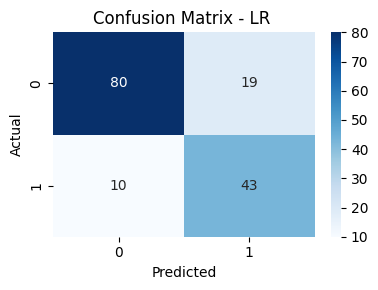

LR
Train accuracy is  0.809795321637427
Test accuracy is  0.8065789473684211
________________________________________
              precision    recall  f1-score   support

          No     0.9231    0.8485    0.8842        99
         Yes     0.7541    0.8679    0.8070        53

    accuracy                         0.8553       152
   macro avg     0.8386    0.8582    0.8456       152
weighted avg     0.8642    0.8553    0.8573       152



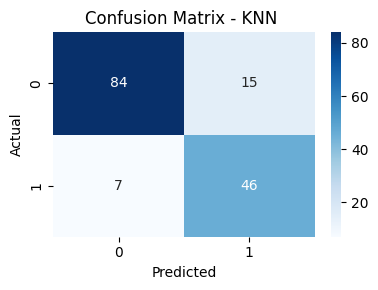

KNN
Train accuracy is  0.898684210526316
Test accuracy is  0.85
________________________________________
              precision    recall  f1-score   support

          No     0.9101    0.8182    0.8617        99
         Yes     0.7143    0.8491    0.7759        53

    accuracy                         0.8289       152
   macro avg     0.8122    0.8336    0.8188       152
weighted avg     0.8418    0.8289    0.8318       152



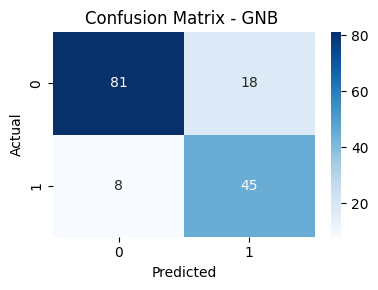

GNB
Train accuracy is  0.8232456140350879
Test accuracy is  0.8263157894736842
________________________________________
              precision    recall  f1-score   support

          No     0.9184    0.9091    0.9137        99
         Yes     0.8333    0.8491    0.8411        53

    accuracy                         0.8882       152
   macro avg     0.8759    0.8791    0.8774       152
weighted avg     0.8887    0.8882    0.8884       152



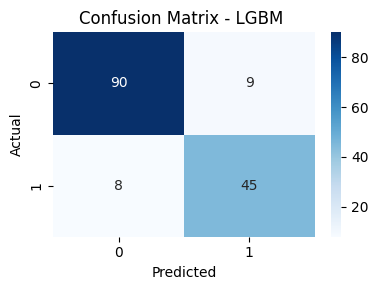

LGBM
Train accuracy is  1.0
Test accuracy is  0.8960526315789472
________________________________________
              precision    recall  f1-score   support

          No     0.9213    0.8283    0.8723        99
         Yes     0.7302    0.8679    0.7931        53

    accuracy                         0.8421       152
   macro avg     0.8258    0.8481    0.8327       152
weighted avg     0.8547    0.8421    0.8447       152



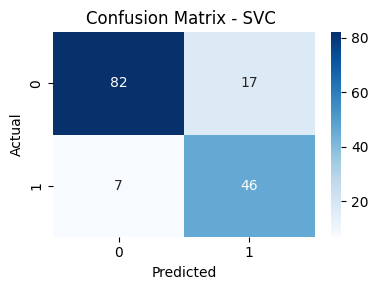

SVC
Train accuracy is  0.826608187134503
Test accuracy is  0.8236842105263158
________________________________________
              precision    recall  f1-score   support

          No     0.9176    0.7879    0.8478        99
         Yes     0.6866    0.8679    0.7667        53

    accuracy                         0.8158       152
   macro avg     0.8021    0.8279    0.8072       152
weighted avg     0.8371    0.8158    0.8195       152



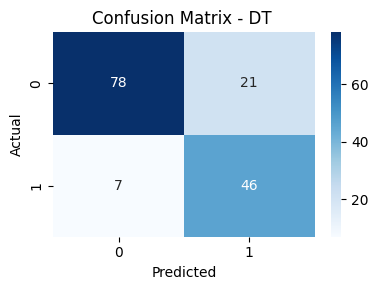

DT
Train accuracy is  0.9109649122807018
Test accuracy is  0.8723684210526315
________________________________________
              precision    recall  f1-score   support

          No     0.9451    0.8687    0.9053        99
         Yes     0.7869    0.9057    0.8421        53

    accuracy                         0.8816       152
   macro avg     0.8660    0.8872    0.8737       152
weighted avg     0.8899    0.8816    0.8832       152



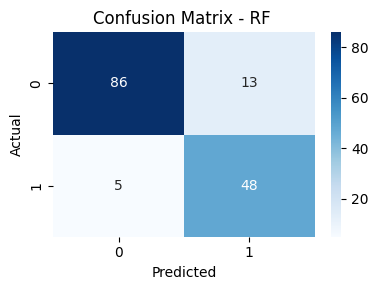

RF
Train accuracy is  0.949561403508772
Test accuracy is  0.881578947368421
________________________________________
              precision    recall  f1-score   support

          No     0.9355    0.8788    0.9062        99
         Yes     0.7966    0.8868    0.8393        53

    accuracy                         0.8816       152
   macro avg     0.8660    0.8828    0.8728       152
weighted avg     0.8871    0.8816    0.8829       152



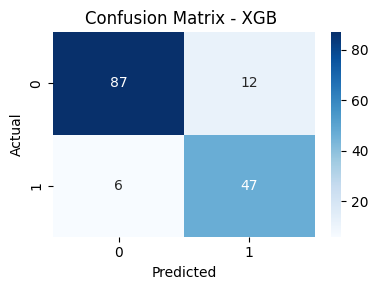

XGB
Train accuracy is  0.9907894736842104
Test accuracy is  0.8960526315789474
________________________________________
              precision    recall  f1-score   support

          No     0.9348    0.8687    0.9005        99
         Yes     0.7833    0.8868    0.8319        53

    accuracy                         0.8750       152
   macro avg     0.8591    0.8777    0.8662       152
weighted avg     0.8820    0.8750    0.8766       152



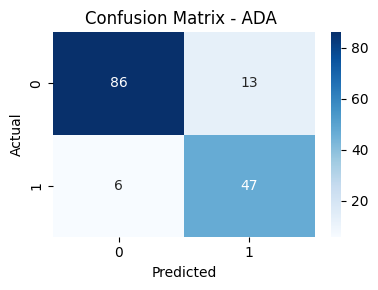

ADA
Train accuracy is  0.8964912280701756
Test accuracy is  0.8644736842105264
________________________________________
              precision    recall  f1-score   support

          No     0.9263    0.8889    0.9072        99
         Yes     0.8070    0.8679    0.8364        53

    accuracy                         0.8816       152
   macro avg     0.8667    0.8784    0.8718       152
weighted avg     0.8847    0.8816    0.8825       152



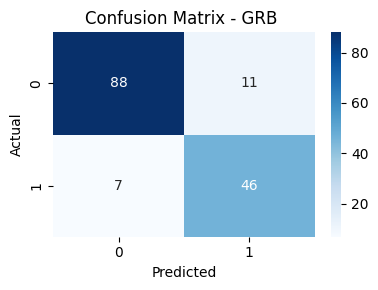

GRB
Train accuracy is  1.0
Test accuracy is  0.8934210526315789
________________________________________
              precision    recall  f1-score   support

          No     0.9149    0.8687    0.8912        99
         Yes     0.7759    0.8491    0.8108        53

    accuracy                         0.8618       152
   macro avg     0.8454    0.8589    0.8510       152
weighted avg     0.8664    0.8618    0.8632       152



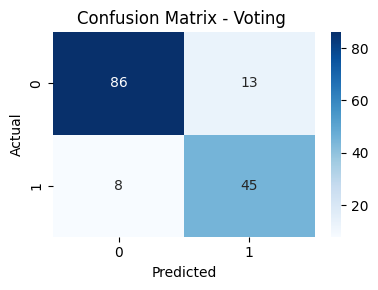

Voting
Train accuracy is  0.9792397660818712
Test accuracy is  0.8934210526315791
________________________________________


In [30]:
results= []
for model in Model:

    #creating list for Pipeline
    steps= list()
    #steps.append(("feature_selection", SelectFromModel(RandomForestClassifier(max_depth=100, random_state=42), threshold=0.2)))
    steps.append(("scaler",MinMaxScaler()))
    steps.append(('OS', RandomOverSampler(random_state=42)))
    steps.append(model)
    pipeline = Pipeline(steps=steps)
    
    #Extracting Pred Values
    scores = cross_validate(pipeline,x,y,cv=10, return_train_score=True, scoring="accuracy")
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    
    #Getting Reports for our Models
    compute_classification_report( y_test,y_pred,model)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    CV_Train = scores["train_score"].mean()
    CV_Test = scores["test_score"].mean()
    
    # Show data
    print(model[0])
    print("Train accuracy is ",scores["train_score"].mean())
    print("Test accuracy is ",scores["test_score"].mean())
    print("_"*40)
    results.append({
    "Model": model[0],
    "Train Accuracy": CV_Train,"Test Accuracy":CV_Test,
    "Accuracy": acc,"Precision": prec,"Recall": rec,"F1 Score": f1})

# Models Report

In [31]:
results_df = pd.DataFrame(results)
results_df["Gap"] = (results_df["Train Accuracy"] - results_df["Test Accuracy"])*100
results_df.sort_values(by="Gap")

,Model,Train Accuracy,Test Accuracy,Accuracy,Precision,Recall,F1 Score,Gap
2,GNB,0.823246,0.826316,0.828947,0.714286,0.849057,0.775862,-0.307018
4,SVC,0.826608,0.823684,0.842105,0.730159,0.867925,0.793103,0.292398
0,LR,0.809795,0.806579,0.809211,0.693548,0.811321,0.747826,0.321637
8,ADA,0.896491,0.864474,0.875000,0.783333,0.886792,0.831858,3.201754
5,DT,0.910965,0.872368,0.815789,0.686567,0.867925,0.766667,3.859649
1,KNN,0.898684,0.850000,0.855263,0.754098,0.867925,0.807018,4.868421
6,RF,0.949561,0.881579,0.881579,0.786885,0.905660,0.842105,6.798246
10,Voting,0.979240,0.893421,0.861842,0.775862,0.849057,0.810811,8.581871
7,XGB,0.990789,0.896053,0.881579,0.796610,0.886792,0.839286,9.473684
3,LGBM,1.000000,0.896053,0.888158,0.833333,0.849057,0.841121,10.394737


## 📦 Model Comparison: Barplot of Performance Metrics

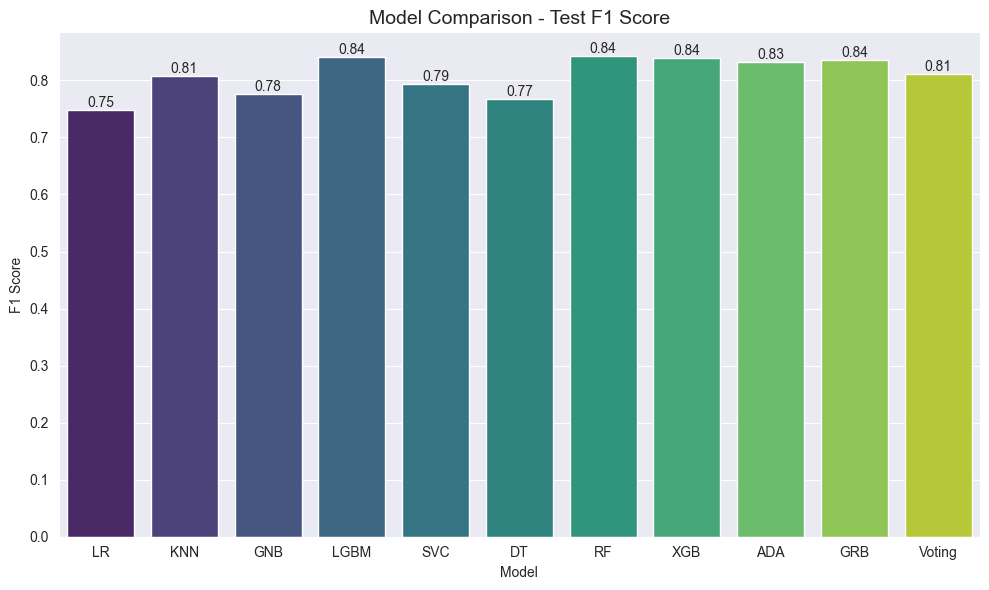

In [32]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
ax=sns.barplot(x="Model", y="F1 Score", data=results_df, palette="viridis")
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f')
plt.title("Model Comparison - Test F1 Score", fontsize=14)
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.show()


## 🧾 Project Summary

**Highlights:**  
- Loaded and explored a real-world diabetes dataset  
- Preprocessed features using `StandardScaler`  
- Trained and compared multiple models (LogReg, SVM, RF, XGBoost, etc.)  
- Evaluated using Accuracy, Precision, Recall, and F1-Score  
- Visualized results using a clean Barplot  

**Skills Demonstrated:**  
`Data Cleaning`, `EDA`, `Model Evaluation`, `Seaborn`, `Machine Learning Pipelines`, `Visualization`, `Python`, `Scikit-learn`, `XGBoost`
